Source: http://drivendata.co/blog/worldbank-poverty-benchmark/

In [1]:
%matplotlib inline

import os

import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss

import matplotlib.pyplot as plt

from imblearn.over_sampling import SMOTE

# data directory
DATA_DIR = os.path.join('.', 'data')

In [2]:
data_paths = {'A': {'train': os.path.join(DATA_DIR, 'A', 'A_hhold_train.csv'), 
                    'test':  os.path.join(DATA_DIR, 'A', 'A_hhold_test.csv')}, 
              
              'B': {'train': os.path.join(DATA_DIR, 'B', 'B_hhold_train.csv'), 
                    'test':  os.path.join(DATA_DIR, 'B', 'B_hhold_test.csv')}, 
              
              'C': {'train': os.path.join(DATA_DIR, 'C', 'C_hhold_train.csv'), 
                    'test':  os.path.join(DATA_DIR, 'C', 'C_hhold_test.csv')}}

In [3]:
# load training data
a_train = pd.read_csv(data_paths['A']['train'], index_col='id')
b_train = pd.read_csv(data_paths['B']['train'], index_col='id')
c_train = pd.read_csv(data_paths['C']['train'], index_col='id')

In [4]:
a_train.head()

wBXbHZmp SlDKnCuu KAJOWiiw DsKacCdL rtPrBBPl tMJrvvut jdetlNNF maLAYXwi  \
id                                                                              
46107    JhtDR    GUusz    TuovO    ZYabk    feupP    PHMVg    NDTCU    cLAGr   
82739    JhtDR    GUusz    TuovO    ZYabk    feupP    PHMVg    NDTCU    sehIp   
9646     JhtDR    GUusz    BIZns    ZYabk    uxuSS    PHMVg    NDTCU    sehIp   
10975    JhtDR    GUusz    TuovO    ZYabk    feupP    PHMVg    NDTCU    sehIp   
16463    JhtDR    alLXR    TuovO    ZYabk    feupP    PHMVg    NDTCU    cLAGr   

      vwpsXRGk sArDRIyX   ...   sDGibZrP CsGvKKBJ OLpGAaEu LrDrWRjC JCDeZBXq  \
id                        ...                                                  
46107    XAmOF    MwLvg   ...      JqHnW    MaXfS    etZsD    idRwx    LPtkN   
82739    lwCkE    MwLvg   ...      JqHnW    MaXfS    HxnJy    idRwx    UyAms   
9646     qNABl    MwLvg   ...      JqHnW    MaXfS    USRak    idRwx    UyAms   
10975    sPNOc    MwLvg   ...      JqHnW    MaXfS    USRak    idRwx    UyAms   
16463    NdlDR    MwLvg   ...      JqHnW    MaXfS    etZsD    idRwx    UyAms   

      HGPWuGlV GDUPaBQs WuwrCsIY AlDbXTlZ country  
id                                                 
46107    vkbkA    qQxrL    AITFl    aQeIm       A  
82739    vkbkA    qQxrL    AITFl    cecIq       A  
9646     vkbkA    qQxrL    AITFl    cecIq       A  
10975    vkbkA    qQxrL    AITFl    cecIq       A  
16463    vkbkA    qQxrL    GAZGl    aQeIm       A  

[5 rows x 345 columns]

In [5]:
b_train.head()

RzaXNcgd LfWEhutI jXOqJdNL  wJthinfa PTLgvdlQ  ZvEApWrk euTESpHe  \
id                                                                       
57071    zTghO    pYfmQ    lNhMv        42    RQnVj       103    jpSeC   
18973    zTghO    pYfmQ    lNhMv        34    iuxWN        -2    OLVWN   
20151    zTghO    pYfmQ    lNhMv        34    iuxWN       313    OMRWa   
5730     zTghO    pYfmQ    lNhMv        58    iuxWN       138    jpSeC   
35033    zTghO    pYfmQ    lNhMv       122    iuxWN        68    OLVWN   

      bDVMMSYY aSzMhjgD ZehDbxxy   ...   YVMuyCUV AZVtosGB toZzckhe BkiXyuSp  \
id                                 ...                                         
57071    FDqwJ    rxJJI    IbWRL   ...      nZcTi    pdvWY    LLuZj    qpzpO   
18973    FDqwJ    ufugi    IbWRL   ...      nZcTi    XrijK    LLuZj    qpzpO   
20151    FDqwJ    rxJJI    IbWRL   ...      nZcTi    FEjSW    lmjln    qpzpO   
5730     FDqwJ    rxJJI    IbWRL   ...      nZcTi    XrijK    lmjln    ZZzXr   
35033    FDqwJ    rxJJI    IbWRL   ...      nZcTi    CRHYU    lmjln    qpzpO   

      ggucvVUs VMvwrYds VlNidRNP rljjAmaN ChbSWYhO country  
id                                                          
57071    kZRgh    VwGOP    DScEf    SKBnS    Enull       B  
18973    kZRgh    VwGOP    JOdCB    SKBnS    Enull       B  
20151    kZRgh    VwGOP    JOdCB    SKBnS    Enull       B  
5730     kZRgh    VwGOP    ZwQQe    SKBnS    Enull       B  
35033    kZRgh    VwGOP    WFgZH    SKBnS    Enull       B  

[5 rows x 442 columns]

In [6]:
c_train.head()

GRGAYimk DNnBfiSI cNDTCUPU GvTJUYOo vmKoAlVH  LhUIIEHQ DTNyjXJp  \
id                                                                      
57211    RslOh    SuNUt    gJLrc    EPKkJ    qKiiE         7    XuMYE   
62519    jPUAt    boDkI    gJLrc    EPKkJ    YXkKd         7    XuMYE   
11614    OpTiw    boDkI    vURog    EPKkJ    qKiiE         9    XuMYE   
6470     RslOh    VgxgY    gJLrc    EPKkJ    YXkKd         9    zfhKi   
33558    IXFlv    VgxgY    kPTaD    EPKkJ    YXkKd         9    XuMYE   

       PNAiwXUz ABnhybHK yiuxBjHP   ...   AJHrHUkH PaEKIlvv bFEsoTgJ ihACfisf  \
id                                  ...                                         
57211        -5    QqETe    umyco   ...      laFxs    kBQRJ    qcUVH    AmPtx   
62519       331    sEJgr    yYwlq   ...      laFxs    kBQRJ    eusFW    AmPtx   
11614        -1    sEJgr    umyco   ...      laFxs    oUXSJ    eusFW    AmPtx   
6470         -5    sEJgr    umyco   ...      laFxs    kBQRJ    jqrBN    AmPtx   
33558        23    sEJgr    umyco   ...      laFxs    kBQRJ    eusFW    AmPtx   

      obIQUcpS  lAvdypjD  ARWytYMz eqJPmiPb mmoCpqWS country  
id                                                            
57211    YXwVA     jSoky     NwjRA    wnPqZ       52       C  
62519    LSPRW     jSoky     NwjRA    wnPqZ      100       C  
11614    YXwVA     jSoky     NwjRA    wnPqZ       70       C  
6470     YXwVA     jSoky     NwjRA    wnPqZ       10       C  
33558    LSPRW     jSoky     herus    wnPqZ       -5       C  

[5 rows x 164 columns]

In [7]:
a_train.head()

wBXbHZmp SlDKnCuu KAJOWiiw DsKacCdL rtPrBBPl tMJrvvut jdetlNNF maLAYXwi  \
id                                                                              
46107    JhtDR    GUusz    TuovO    ZYabk    feupP    PHMVg    NDTCU    cLAGr   
82739    JhtDR    GUusz    TuovO    ZYabk    feupP    PHMVg    NDTCU    sehIp   
9646     JhtDR    GUusz    BIZns    ZYabk    uxuSS    PHMVg    NDTCU    sehIp   
10975    JhtDR    GUusz    TuovO    ZYabk    feupP    PHMVg    NDTCU    sehIp   
16463    JhtDR    alLXR    TuovO    ZYabk    feupP    PHMVg    NDTCU    cLAGr   

      vwpsXRGk sArDRIyX   ...   sDGibZrP CsGvKKBJ OLpGAaEu LrDrWRjC JCDeZBXq  \
id                        ...                                                  
46107    XAmOF    MwLvg   ...      JqHnW    MaXfS    etZsD    idRwx    LPtkN   
82739    lwCkE    MwLvg   ...      JqHnW    MaXfS    HxnJy    idRwx    UyAms   
9646     qNABl    MwLvg   ...      JqHnW    MaXfS    USRak    idRwx    UyAms   
10975    sPNOc    MwLvg   ...      JqHnW    MaXfS    USRak    idRwx    UyAms   
16463    NdlDR    MwLvg   ...      JqHnW    MaXfS    etZsD    idRwx    UyAms   

      HGPWuGlV GDUPaBQs WuwrCsIY AlDbXTlZ country  
id                                                 
46107    vkbkA    qQxrL    AITFl    aQeIm       A  
82739    vkbkA    qQxrL    AITFl    cecIq       A  
9646     vkbkA    qQxrL    AITFl    cecIq       A  
10975    vkbkA    qQxrL    AITFl    cecIq       A  
16463    vkbkA    qQxrL    GAZGl    aQeIm       A  

[5 rows x 345 columns]

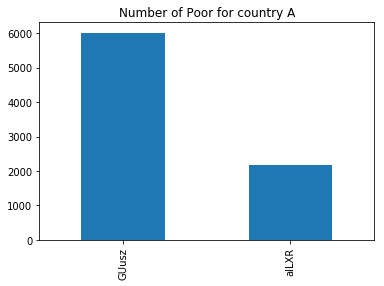

In [8]:
a_train.SlDKnCuu.value_counts().plot.bar(title='Number of Poor for country A')

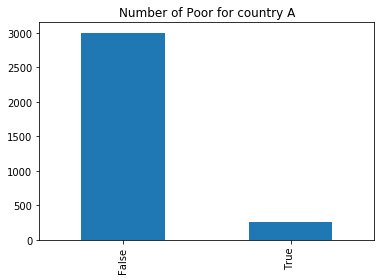

In [9]:
b_train.poor.value_counts().plot.bar(title='Number of Poor for country A')

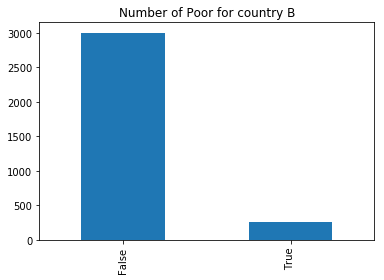

In [10]:
b_train.poor.value_counts().plot.bar(title='Number of Poor for country B')

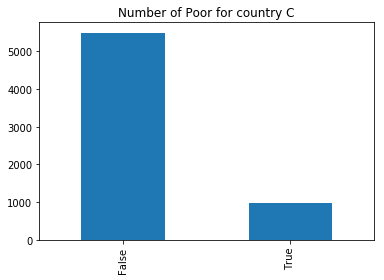

In [11]:
c_train.poor.value_counts().plot.bar(title='Number of Poor for country C')

In [12]:
print(a_train.poor.value_counts()/len(a_train))
print(b_train.poor.value_counts()/len(b_train))
print(c_train.poor.value_counts()/len(c_train))

False    0.54858
True     0.45142
Name: poor, dtype: float64
False    0.922888
True     0.077112
Name: poor, dtype: float64
False    0.84959
True     0.15041
Name: poor, dtype: float64


In [13]:
a_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8203 entries, 46107 to 39832
Columns: 345 entries, wBXbHZmp to country
dtypes: bool(1), float64(2), int64(2), object(340)
memory usage: 21.6+ MB


In [14]:
b_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3255 entries, 57071 to 4923
Columns: 442 entries, RzaXNcgd to country
dtypes: bool(1), float64(9), int64(14), object(418)
memory usage: 11.0+ MB


In [15]:
c_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6469 entries, 57211 to 7646
Columns: 164 entries, GRGAYimk to country
dtypes: bool(1), float64(1), int64(29), object(133)
memory usage: 8.1+ MB


In [16]:
# Standardize features
def standardize(df, numeric_only=True):
    numeric = df.select_dtypes(include=['int64', 'float64'])
    
    # subtracy mean and divide by std
    df[numeric.columns] = (numeric - numeric.mean()) / numeric.std()
    
    return df
    
def pre_process_data(df, enforce_cols=None):
    print("Input shape:\t{}".format(df.shape))
        
    df = standardize(df)
    print("After standardization {}".format(df.shape))
        
    # create dummy variables for categoricals
    df = pd.get_dummies(df)
    print("After converting categoricals:\t{}".format(df.shape))
    
    # match test set and training set columns
    if enforce_cols is not None:
        to_drop = np.setdiff1d(df.columns, enforce_cols)
        to_add = np.setdiff1d(enforce_cols, df.columns)

        df.drop(to_drop, axis=1, inplace=True)
        df = df.assign(**{c: 0 for c in to_add})
    
    df.fillna(0, inplace=True)
    
    return df

Split training set into train and dev

In [17]:
print("Country A")
aX_train = pre_process_data(a_train) #.drop('poor', axis=1)
aX_train_joint = aX_train.copy()
a_train, a_dev = train_test_split(aX_train, random_state=1, train_size=0.80) # random_state = 347
aX_train = a_train.drop('poor', axis=1)
ay_train = np.ravel(a_train.poor)
aX_dev = a_dev.drop('poor', axis=1)
ay_dev = np.ravel(a_dev.poor)

print("\nCountry B")
bX_train = pre_process_data(b_train)
b_train, b_dev = train_test_split(bX_train, random_state=1, train_size=0.80)
bX_train = b_train.drop('poor', axis=1)
by_train = np.ravel(b_train.poor)
bX_dev = b_dev.drop('poor', axis=1)
by_dev = np.ravel(b_dev.poor)

print("\nCountry C")
cX_train = pre_process_data(c_train)
c_train, c_dev = train_test_split(cX_train, random_state=1, train_size=0.80)
cX_train = c_train.drop('poor', axis=1)
cy_train = np.ravel(c_train.poor)
cX_dev = c_dev.drop('poor', axis=1)
cy_dev = np.ravel(c_dev.poor)

Country A
Input shape:	(8203, 345)
After standardization (8203, 345)
After converting categoricals:	(8203, 860)

Country B
Input shape:	(3255, 442)
After standardization (3255, 442)


/Users/istvanhoffer/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


After converting categoricals:	(3255, 1433)

Country C
Input shape:	(6469, 164)
After standardization (6469, 164)
After converting categoricals:	(6469, 796)


In [18]:
aX_train.head()

nEsgxvAq  OMtioXZZ  YFMZwKrU  TiwRslOh  wBXbHZmp_DkQlr  wBXbHZmp_JhtDR  \
id                                                                              
91335  0.617910  0.325746 -1.131816 -1.522386               0               1   
48746 -0.414625  1.154960  1.099716 -1.522386               0               1   
54785  0.617910  0.325746  1.099716 -1.075215               0               1   
79374  0.617910  0.325746 -0.016050  1.160637               0               1   
86371  0.617910 -0.503468 -1.131816  1.607808               0               1   

       SlDKnCuu_GUusz  SlDKnCuu_alLXR  KAJOWiiw_BIZns  KAJOWiiw_TuovO  \
id                                                                      
91335               0               1               1               0   
48746               0               1               0               1   
54785               1               0               0               1   
79374               1               0               1               0   
86371               1               0               0               1   

         ...      JCDeZBXq_UyAms  HGPWuGlV_WKNwg  HGPWuGlV_vkbkA  \
id       ...                                                       
91335    ...                   0               0               1   
48746    ...                   1               0               1   
54785    ...                   0               0               1   
79374    ...                   1               0               1   
86371    ...                   1               0               1   

       GDUPaBQs_qCEuA  GDUPaBQs_qQxrL  WuwrCsIY_AITFl  WuwrCsIY_GAZGl  \
id                                                                      
91335               0               1               1               0   
48746               0               1               1               0   
54785               0               1               1               0   
79374               0               1               1               0   
86371               0               1               1               0   

       AlDbXTlZ_aQeIm  AlDbXTlZ_cecIq  country_A  
id                                                
91335               0               1          1  
48746               0               1          1  
54785               1               0          1  
79374               1               0          1  
86371               0               1          1  

[5 rows x 859 columns]

In [19]:
aX_train_joint.columns

Index(['nEsgxvAq', 'OMtioXZZ', 'YFMZwKrU', 'poor', 'TiwRslOh',
       'wBXbHZmp_DkQlr', 'wBXbHZmp_JhtDR', 'SlDKnCuu_GUusz', 'SlDKnCuu_alLXR',
       'KAJOWiiw_BIZns',
       ...
       'JCDeZBXq_UyAms', 'HGPWuGlV_WKNwg', 'HGPWuGlV_vkbkA', 'GDUPaBQs_qCEuA',
       'GDUPaBQs_qQxrL', 'WuwrCsIY_AITFl', 'WuwrCsIY_GAZGl', 'AlDbXTlZ_aQeIm',
       'AlDbXTlZ_cecIq', 'country_A'],
      dtype='object', length=860)

In [20]:
import operator

fraction_dict = {}
for col_name in aX_train_joint.columns:
    fraction_dict[col_name] = aX_train_joint[col_name].value_counts()/len(aX_train_joint)
correlation_dict = dict(aX_train_joint.corr().poor)
ordered_cols = sorted(correlation_dict.items(), key=operator.itemgetter(1))

In [21]:
# For each column:
# Print column name, correlation with 'poor', and distribution of values
for row in ordered_cols:
    print(row[0], row[1], dict(fraction_dict[row[0]]))

QyBloWXZ_LKzoc -0.407871384462 {1: 0.6472022430817993, 0: 0.35279775691820064}
wEbmsuJO_MKsqC -0.397502894602 {0: 0.64378885773497496, 1: 0.35621114226502498}
GhJKwVWC_BZDbR -0.385124756781 {0: 0.79361209313665737, 1: 0.20638790686334268}
IZFarbPw_YNtzq -0.377391673385 {0: 0.67914177739851278, 1: 0.32085822260148728}
ggNglVqE_vJxeZ -0.363387118781 {0: 0.55942947702060219, 1: 0.44057052297939781}
xkUFKUoW_lKjvc -0.357185945331 {1: 0.64964037547238818, 0: 0.35035962452761182}
qgxmqJKa_CxUFg -0.356692306348 {0: 0.65573570644886015, 1: 0.3442642935511398}
AsEmHUzj_GTHec -0.339323882944 {0: 0.73668170181640868, 1: 0.26331829818359137}
LjvKYNON_yVlbR -0.333685913355 {0: 0.74826283067170551, 1: 0.25173716932829454}
bMudmjzJ_mOETh -0.332164779571 {0: 0.72961111788370103, 1: 0.27038888211629891}
pCgBHqsR_iVlle -0.325396275924 {0: 0.62160185298061688, 1: 0.37839814701938318}
vRIvQXtC_lUYjh -0.311506385255 {0: 0.64683652322321106, 1: 0.353163476776789}
hnrnuMte_FmBLH -0.304198201299 {0: 0.8656589

vwpsXRGk_RpXJc -0.140804802811 {0: 0.96769474582469828, 1: 0.032305254175301716}
mRgnuJVE_KkIYu -0.140653933213 {0: 0.64098500548579784, 1: 0.3590149945142021}
nSzbETYS_AhXJy -0.139562158699 {0: 0.64074119224673898, 1: 0.35925880775326102}
YlZCqMNw_UPXKK -0.139279169307 {0: 0.80555894185054244, 1: 0.1944410581494575}
UHGnBrNt_YGDQb -0.139089929347 {0: 0.64439839083262218, 1: 0.35560160916737776}
HmDAlkAH_XDRNN -0.138681621254 {0: 0.64122881872485671, 1: 0.35877118127514324}
VZtBaoXL_usVYt -0.138161806053 {0: 0.64208216506156279, 1: 0.35791783493843715}
hESBInAl_qmAUD -0.137924683468 {0: 0.64391076435450445, 1: 0.35608923564549555}
TqrXZaOw_ihCpA -0.136988729539 {0: 0.97220529074728756, 1: 0.027794709252712421}
FlBqizNL_CalgA -0.136946082556 {0: 0.59758624893331713, 1: 0.40241375106668292}
uRFXnNKV_SduuS -0.136757593585 {1: 0.53321955382177255, 0: 0.4667804461782275}
TWXCrjor_jcWFw -0.136319357025 {0: 0.64366695111544558, 1: 0.35633304888455442}
bPOwgKnT_THHLT -0.136242940276 {0: 0.5155

UXSJUVwD_IHJnm 0.0418004498421 {1: 0.88626112397903201, 0: 0.11373887602096794}
cgJgOfCA_lVtXj 0.0424001181893 {1: 0.99512373521882236, 0: 0.0048762647811776182}
lTAXSTys_EzaJv 0.0427128022677 {1: 0.99390466902352803, 0: 0.0060953309764720225}
vwpsXRGk_lwCkE 0.0428806795484 {0: 0.96879190540046323, 1: 0.031208094599536756}
BIofZdtd_XXDhf 0.0443575116427 {1: 0.95745458978422526, 0: 0.042545410215774716}
fhKiXuMY_nJuqx 0.0452260448441 {1: 0.97683774228940634, 0: 0.023162257710593687}
HGPWuGlV_vkbkA 0.0452263933048 {1: 0.98707789832987936, 0: 0.012922101670120688}
ltcNxFzI_eGKYm 0.045677937701 {0: 0.74960380348652933, 1: 0.25039619651347067}
WTFJilSZ_bOZlo 0.0460366484402 {1: 0.98975984395952699, 0: 0.010240156040472998}
btgWptTG_KYiZb 0.0461415163471 {1: 0.9461172741679873, 0: 0.05388272583201268}
vwpsXRGk_mIqzL 0.0462060958611 {0: 0.96745093258563941, 1: 0.032549067414360602}
JeydMEpC_TGEpP 0.0468313057301 {1: 0.9911008167743508, 0: 0.0088991832256491519}
kWFVfHWP_ddRKR 0.0469459321853 

In [22]:
from sklearn.ensemble import RandomForestClassifier

def train_rf(features, labels, **kwargs):
    model = RandomForestClassifier(n_estimators=150, random_state=0)
    model.fit(features, labels)
    
    return model

In [23]:
from sklearn.linear_model import LogisticRegression

def train_regression(features, labels, **kwargs):
    smote = SMOTE()
    features, labels = smote.fit_sample(features, labels)
    model = LogisticRegression()
    model.fit(features, labels)
    
    return model

In [24]:
from sklearn.svm import SVC

def train_svc(features, labels, prob=True, **kwargs):
    smote = SMOTE()
    features, labels = smote.fit_sample(features, labels)
    model = SVC(probability=prob)
    model.fit(features, labels)
    
    return model

In [25]:
from sklearn.gaussian_process import GaussianProcessClassifier

def train_gp(features, labels):
    smote = SMOTE()
    features, labels = smote.fit_sample(features, labels)
    model = GaussianProcessClassifier(max_iter_predict = 50, n_restarts_optimizer = 2)
    
    model.fit(features, labels)
    
    return model

In [26]:
from sklearn.neural_network import MLPClassifier

def train_nn(features, labels):
    smote = SMOTE()
    features, labels = smote.fit_sample(features, labels)
    model = MLPClassifier(early_stopping = True, validation_fraction = 0.1, max_iter = 1500, \
                          learning_rate_init = 0.0005, tol = 1e-6, hidden_layer_sizes = (300, 300, 300, 300, 300, 300), \
                         alpha = 0.5, activation = 'identity')
    
    model.fit(features, labels)
    
    return model

In [27]:
from sklearn.tree import DecisionTreeClassifier

def train_dt(features, labels):
    smote = SMOTE()
    features, labels = smote.fit_sample(features, labels)
    model = DecisionTreeClassifier()
    
    model.fit(features, labels)
    
    return model

In [28]:
all_models = ['svc', 'log_regr', 'nn', 'dt', 'gp', 'rf']
aX_train_ensemble = pd.DataFrame(columns=all_models)
bX_train_ensemble = pd.DataFrame(columns=all_models)
cX_train_ensemble = pd.DataFrame(columns=all_models)

aX_dev_ensemble = pd.DataFrame(columns=all_models)
bX_dev_ensemble = pd.DataFrame(columns=all_models)
cX_dev_ensemble = pd.DataFrame(columns=all_models)

aX_test_ensemble = pd.DataFrame(columns=all_models)
bX_test_ensemble = pd.DataFrame(columns=all_models)
cX_test_ensemble = pd.DataFrame(columns=all_models)

In [29]:
# load test data
a_test = pd.read_csv(data_paths['A']['test'], index_col='id')
b_test = pd.read_csv(data_paths['B']['test'], index_col='id')
c_test = pd.read_csv(data_paths['C']['test'], index_col='id')

# process the test data
a_test = pre_process_data(a_test, enforce_cols=aX_train.columns)
b_test = pre_process_data(b_test, enforce_cols=bX_train.columns)
c_test = pre_process_data(c_test, enforce_cols=cX_train.columns)

Input shape:	(4041, 344)
After standardization (4041, 344)
After converting categoricals:	(4041, 851)
Input shape:	(1604, 441)
After standardization (1604, 441)
After converting categoricals:	(1604, 1419)
Input shape:	(3187, 163)
After standardization (3187, 163)
After converting categoricals:	(3187, 773)


In [30]:
def predict_with_model(train_func, X_train, y_train, X_dev, y_dev, X_test, train_ensemble, dev_ensemble,
                       test_ensemble, model_str, country_str):
    model = train_func(X_train, y_train)
    train_ensemble[model_str] = model.predict_proba(X_train)[:,1]
    dev_ensemble[model_str] = model.predict_proba(X_dev)[:,1]
    dev_loss = log_loss(y_dev, dev_ensemble[model_str])
    print(country_str, model_str, dev_loss)
    test_ensemble[model_str] = model.predict_proba(X_test)[:,1]

In [31]:
import time
# TODO: Can try leaving out GP as it takes ages to compute and adds little to performance
train_funcs = [train_regression, train_svc, train_nn, train_dt, train_rf, train_gp]
model_strs = ['log_regr', 'svc', 'nn', 'dt', 'rf', 'gp']
country_strs = ['A', 'B', 'C']
X_train_sets = [aX_train, bX_train, cX_train]
y_train_sets = [ay_train, by_train, cy_train]
train_ensembles = [aX_train_ensemble, bX_train_ensemble, cX_train_ensemble]
X_dev_sets = [aX_dev, bX_dev, cX_dev]
y_dev_sets = [ay_dev, by_dev, cy_dev]
dev_ensembles = [aX_dev_ensemble, bX_dev_ensemble, cX_dev_ensemble]
test_ensembles = [aX_test_ensemble, bX_test_ensemble, cX_test_ensemble]
test_sets = [a_test, b_test, c_test]
prev_time = time.time()
for c in range(len(country_strs)):
    for m in range(len(train_funcs)):
        predict_with_model(train_funcs[m], X_train_sets[c], y_train_sets[c], X_dev_sets[c], y_dev_sets[c], test_sets[c],
                           train_ensembles[c], dev_ensembles[c], test_ensembles[c], model_strs[m], country_strs[c])
        new_time = time.time()
        print(new_time - prev_time)
        prev_time = new_time

A log_regr 0.29725446569
17.753345727920532
A svc 0.294980211685
222.9262819290161
A nn 0.287007219346
25.971854209899902
A dt 8.33487298369
16.68987488746643
A rf 0.412000045212
4.589291095733643
B log_regr 0.394885451515
1.8031771183013916
B svc 0.284671755103
130.12607073783875
B nn 0.483843079993
9.993428945541382
B dt 4.08527092093
1.4965722560882568
B rf 0.278654806484
1.3120429515838623
C log_regr 0.299985706588
2.336782932281494
C svc 0.313935648775
193.85627222061157
C nn 0.417041712187
28.895379781723022
C dt 0.480453454931
1.700951099395752
C rf 0.152934925924
1.8526089191436768


In [33]:
# run regression on ensemble features
from sklearn.linear_model import SGDClassifier

# Skip decision tree because of high dev loss
selected_models = ['log_regr','svc','nn','rf','gp']

a_ensemble_model = LogisticRegression(random_state=1, C=0.1)#, loss='log', penalty='elasticnet')
a_ensemble_model.fit(aX_train_ensemble[selected_models], ay_train)
print('A', log_loss(ay_dev, a_ensemble_model.predict_proba(aX_dev_ensemble[selected_models])))
print(a_ensemble_model.coef_)

b_ensemble_model = LogisticRegression(random_state=1, C=0.2)#, loss='log', penalty='elasticnet')
b_ensemble_model.fit(bX_train_ensemble[selected_models], by_train)
print('B', log_loss(by_dev, b_ensemble_model.predict_proba(bX_dev_ensemble[selected_models])))
print(b_ensemble_model.coef_)

# TODO: can try submitting with less regularisation, I think that means lower alpha (0.0001 by default)
c_ensemble_model = SGDClassifier(random_state=1, loss='log', penalty='elasticnet')#, alpha=0.00001)#, n_iter=50)
c_ensemble_model.fit(cX_train_ensemble[selected_models], cy_train)
print('C', log_loss(cy_dev, c_ensemble_model.predict_proba(cX_dev_ensemble[selected_models])))
print(c_ensemble_model.coef_)

A 0.329012161681
[[ 1.3368968   0.01072162  0.57561029  7.21738122]]
B 0.219079697831
[[ 3.09281559  0.22597239  1.28204122  3.09485632]]
C 0.105680058224
[[  2.85026748  -0.16076637   0.51014421  12.00418152]]


/Users/istvanhoffer/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


### Predicting on test

In [34]:
a_preds = a_ensemble_model.predict_proba(aX_test_ensemble[selected_models])
b_preds = b_ensemble_model.predict_proba(bX_test_ensemble[selected_models])
c_preds = c_ensemble_model.predict_proba(cX_test_ensemble[selected_models])

In [35]:
def make_country_sub(preds, test_feat, country):
    # make sure we code the country correctly
    country_codes = ['A', 'B', 'C']
    
    # get just the poor probabilities
    country_sub = pd.DataFrame(data=preds[:, 1],  # proba p=1
                               columns=['poor'], 
                               index=test_feat.index)

    
    # add the country code for joining later
    country_sub["country"] = country
    return country_sub[["country", "poor"]]

In [36]:
# convert preds to data frames
a_sub = make_country_sub(a_preds, a_test, 'A')
b_sub = make_country_sub(b_preds, b_test, 'B')
c_sub = make_country_sub(c_preds, c_test, 'C')

In [37]:
submission = pd.concat([a_sub, b_sub, c_sub])
submission.head()

country      poor
id                     
418         A  0.034083
41249       A  0.054006
16205       A  0.070803
97501       A  0.044976
67756       A  0.070802

In [38]:
submission.to_csv('submission-ensemble5-3.csv')